テストデータ(分類・回帰・モデル評価・その他ダミー)

In [ ]:
# ドライブ読み込み
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=1f0d41b6cf2a2d0a1dcf3e95240de8d2f0ebc821482463c7409542e48eccb5d3
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import sympy
import math

円の中にランダムに点を打つ



*   reshape(p,q)は p行q列に変換してくれというもの
*   -1は「行数を気にせず」としていっている
*   下は「行数を気にせず、2列にしてくれ」と
*   また、qを-1にして「列数を気にせず」と変換することもできる





*   p.random.uniform(0, 6, 800)
*   0～6の範囲でランダムな値を800個生成



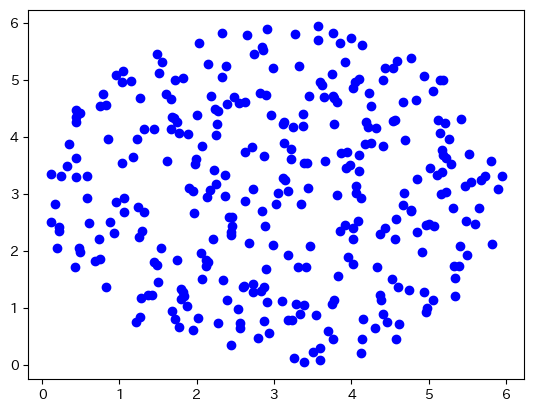

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

R = 3  # 円の半径を設定
position = np.random.uniform(0, 2*R, 800)
#print(position)
#print(type(position))
# print(position.reshape(-1,2))

for xy in position.reshape(-1,2):
    if (xy[0]-R)**2 + (xy[1]-R)**2 < R**2 :
    # 円(x-R)**2+(y-R)**2 = R**2 の内部を表す不等式
        plt.scatter(xy[0],xy[1],color="blue")

plt.show()



*   再現性を確保したい場合は、np.random.seed(42)でシード値を指定し、np.random.uniform(0, 6, 800)と続けます。



四角形の中にランダムに点を打つ

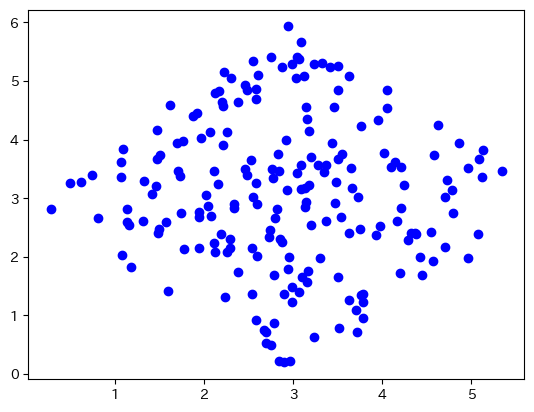

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

R = 3
position = np.random.uniform(0, 2*R, 800)
#print(position.reshape(-1,2))

for xy in position.reshape(-1,2) :
    if abs(xy[0]-R) + abs(xy[1]-R)  < R:
    # 四角形 |x-R|+|y-R| = R の内部を表す不等式
        plt.scatter(xy[0],xy[1],color="blue")

plt.show()

四角形の内部、四角形の外かつ円の内側、円の外の３つで色分けして点を打つ


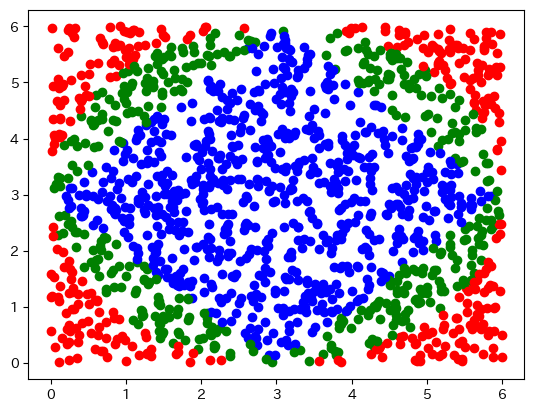

In [ ]:
R = 3
position = np.random.uniform(0, 2*R, 3000)
#print(position.reshape(-1,2))

for xy in position.reshape(-1,2) :
    if abs(xy[0]-R) + abs(xy[1]-R) < R and (xy[0]-R)**2+(xy[1]-R)**2 < R**2:
        plt.scatter(xy[0],xy[1],color="blue")
    # 四角形の内部 かつ 円の内部の点は、青色でプロット
    elif (xy[0]-R)**2+(xy[1]-R)**2 < R**2:
        plt.scatter(xy[0],xy[1],color="green")
    # 上以外で円の内部（四角形の外かつ円の内部）なら、緑色でプロット
    else:
        plt.scatter(xy[0],xy[1],color="red")
    # 上の２つの場合以外（つまり、円の外）なら、赤色でプロット

円柱の内部にランダムに点を打ってみる


*   reshape(-1,3)
*   3次元なので作成したランダムな一次元配列を、3列に変える必要がある



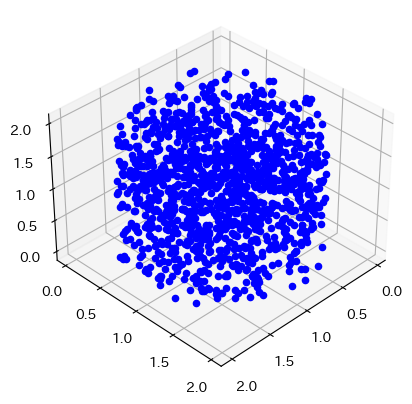

In [ ]:
R = 1
position = np.random.uniform(0, 2*R, 4800)
#print(position.reshape(-1,3)) # 1600行３列に変換

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for xy in position.reshape(-1,3) :
    if (xy[0]-R)**2 + (xy[1]-R)**2 < R**2:
    # 円の内部(x-R)**2+(y-R)**2 < R**2 かつ、z は任意
        ax.scatter(xy[0],xy[1],xy[2],color="blue")

ax.view_init(elev=35, azim=45)
#view.initは視点の位置。elev(エレベーション)は仰角、azim(アジマス)は方位角。
plt.show()

##ミニ演習

球体の内部にランダムに点を打つ

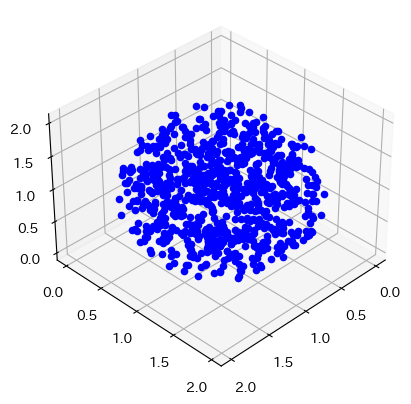

In [ ]:
from matplotlib import projections
R = 1
position = np.random.uniform(0, 2*R, 4800)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for xyz in position.reshape(-1,3):
  if (xyz[0]-R)**2 + (xyz[1]-R)**2 + (xyz[2]-R)**2 < R**2:
    ax.scatter(xyz[0],xyz[1],xyz[2],color='blue')

ax.view_init(elev=35, azim=45)
plt.show()

## 回帰のためのテストデータ



*   y = f(x) の回帰用テストデータは　y = f(x) + ノイズ　で作成する
*   ノイズは、先ほどの np.random.uniform 関数 で生成
*   np.linspace(a, b, c) は、a：開始値、b：終了値、c：分割数　として、
a ~ b の値を等分した値を c 個返します。(つまり、c-1 等分する。)






*   figureとaxisの使い方も復習しよう

Figure内に複数プロットを配置する場合は


*   ax = fig.add_subplot(LMN) または
*   ax = fig.add_subplot(L, M, N)

のように引数でsubplotの配置を指定します。この場合、


*   図を縦にL個、横にM個に分割
*   左上から数えてN番目の領域にAxesオブジェクト作成





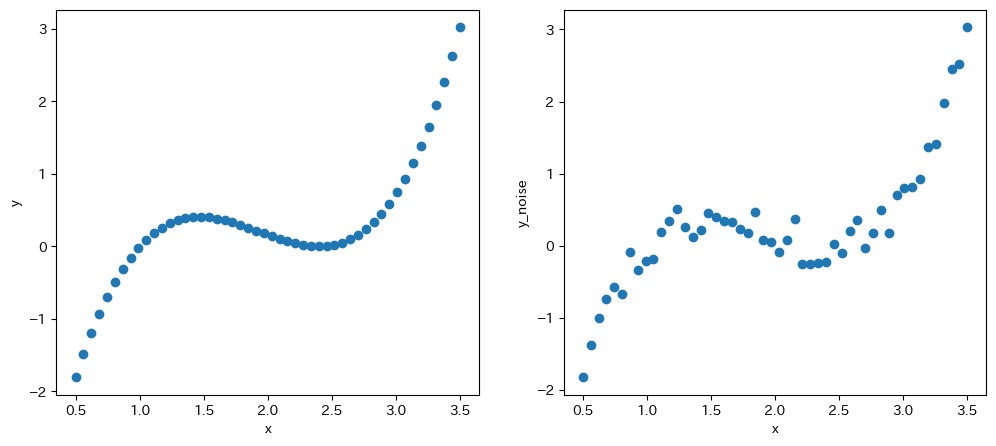

In [ ]:
x = np.linspace(0.5, 3.5, 50)
y = (x-1)*(x-2.4)**2
y_noise = (x-1)*(x-2.4)**2 + np.random.uniform(-0.3, 0.3, 50)

# figsizeは(行方向のサイズ, 列方向のサイズ)
fig = plt.figure(figsize=(12, 5))
# fig にsubplot（１行２列の１番）を加えたものを ax1 とする。
ax1 = fig.add_subplot(121)
# fig にsubplot（１行２列の２番）を加えたものを ax2 とする。
ax2 = fig.add_subplot(122)

ax1.set_xlabel("x") # ax1 に軸名をセット。
ax1.set_ylabel("y")
ax1.scatter(x,y)    # ax1 に点をプロット。

ax2.set_xlabel("x") # ax2 に軸名をセット。
ax2.set_ylabel("y_noise")
ax2.scatter(x,y_noise) # ax2 に点をプロット。

plt.show() # 全体を描画

## モデル評価のためのテストデータ

scikit-learn（sklearn）には、データセットを　学習データとテストデータ　に分割するための関数が用意されている。それが train_test_split 関数。





*   機械学習のテストにおいては、学習に使ったデータを使用してはいけない
*   そのためのデータの区分を分けてくれる関数が用意してくれているということ






*   大事なのはtrain_test_splitの中にあるtest_size
*   0.2にすると20%テストデータに割り振られる
*   指定をしていない場合、25%がテストデータに割り振られる



In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs

# サンプル数100、乱数シード値 0 、説明変数 2 つ、塊数 2 つ、標準偏差 1 のデータセットを用意する。
X, y = make_blobs(n_samples=100, random_state=0,
                  n_features=2, centers=2, cluster_std=1)

# 学習データ、テストデータに分割する
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# .shapeは形を教えてくれる(何行何列)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)
